In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
x = iris.data[:, :2]
y = (iris.target != 0) * 1

In [2]:
import pandas as pd

df = pd.DataFrame({'x_0': x[:, [0]].reshape(150),
                  'x_1': x[:, [1]].reshape(150),
                  'y': y})
df.head()

,x_0,x_1,y
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
sns.scatterplot(x="x_0", y="x_1", data=df, hue="y")
plt.show()

<Figure size 1400x600 with 1 Axes>

In [4]:
import numpy as np

def sigmoid(x, theta):
    z = np.dot(x, theta.T)
    return 1.0 / (1 + np.exp(-z))

In [5]:
def cost_function(h, y):
    loss = ((-y * np.log(h)) - ((1 - y) * np.log(1 - h))).mean()
    return loss

In [6]:
def gradient_descent(x, h, y):
    return np.dot(x.T, (h - y)) / y.shape[0]

In [7]:
def update_loss(theta, learning_rate, gradient):
    return theta - (learning_rate * gradient)

In [8]:
def predict(x, theta):
    threshold = 0.5
    result = sigmoid(x, theta)
    outcome = [0 if result[i] <= threshold else 1 for i in range(x.shape[0])]
    return outcome

In [9]:
def plot_cost_function(cost):
    plt.figure(figsize=(12, 6))
    plt.plot(cost, label="loss")
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()

In [10]:
def plot_predict_classification(x, theta):
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x="x_0", y="x_1", data=df, hue="y")
    x = np.linspace(4, 8, 150)
    y = -(theta[0] + theta[1] * x) / theta[2]
    plt.plot(x, y, color="red")
    plt.show()

In [11]:
cost = []
num_iter = 1000

intercept = np.ones((x.shape[0], 1))
x = np.concatenate((intercept, x), axis=1)
theta = np.zeros(x.shape[1])

for i in range(num_iter):
    h = sigmoid(x, theta)
    cost.append(cost_function(h, y))
    gradient = gradient_descent(x, h, y)
    theta = update_loss(theta, 0.1, gradient)

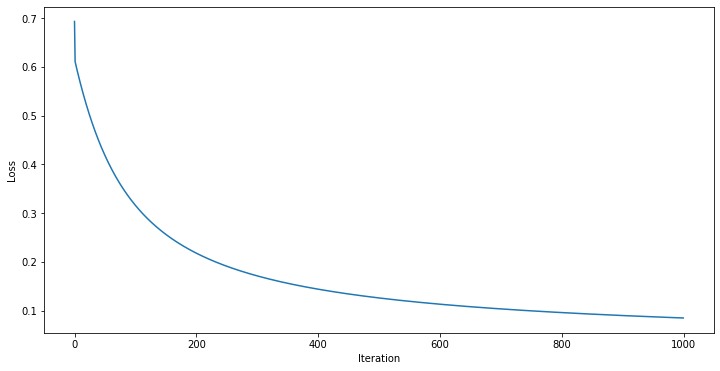

In [12]:
res = predict(x, theta)
plot_cost_function(cost)

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y, res)

array([[ 49,   1],
       [  0, 100]], dtype=int64)

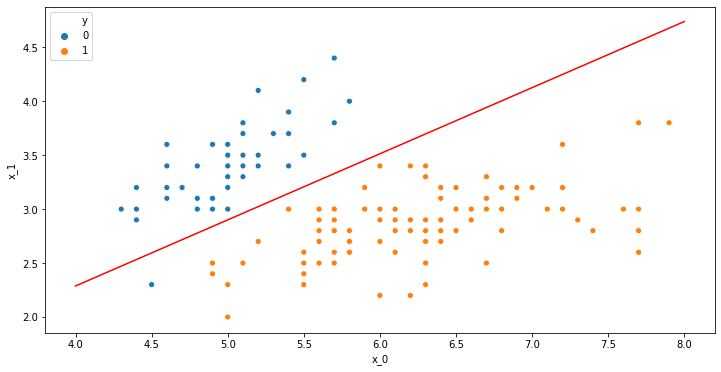

In [14]:
plot_predict_classification(x, theta)